In [204]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [205]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

origin_submission = submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

all_data = pd.read_csv(data_path + 'all_data_5_22_17_10_42.csv' , index_col= 'PassengerId')

In [206]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [208]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [209]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [210]:
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned
PassengerId,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9


In [211]:

all_data['log_Fare'] = np.log(all_data['Fare'])
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned,log_Fare
PassengerId,,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9,1.981001
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2,4.266662
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0,2.070022
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0,3.972177
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0,2.085672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0,2.085672
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6,4.690430
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9,1.981001


In [212]:
all_data['FareBin'] = pd.qcut(all_data['Fare'], 13)
all_data['Fare_clean'] = all_data['FareBin'].astype('category').cat.codes
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned,log_Fare,FareBin,Fare_clean
PassengerId,,,,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9,1.981001,"(3.17, 7.301]",0
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2,4.266662,"(57.0, 83.475]",11
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0,2.070022,"(7.896, 8.05]",3
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0,3.972177,"(35.077, 57.0]",10
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0,2.085672,"(7.896, 8.05]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0,2.085672,"(7.896, 8.05]",3
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6,4.690430,"(83.475, 512.329]",12
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9,1.981001,"(3.17, 7.301]",0


In [213]:
all_data['Family'] = all_data['SibSp'] + all_data['Parch']

all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned,log_Fare,FareBin,Fare_clean,Family
PassengerId,,,,,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9,1.981001,"(3.17, 7.301]",0,1
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2,4.266662,"(57.0, 83.475]",11,1
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0,2.070022,"(7.896, 8.05]",3,0
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0,3.972177,"(35.077, 57.0]",10,1
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0,2.085672,"(7.896, 8.05]",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0,2.085672,"(7.896, 8.05]",3,0
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6,4.690430,"(83.475, 512.329]",12,0
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9,1.981001,"(3.17, 7.301]",0,0


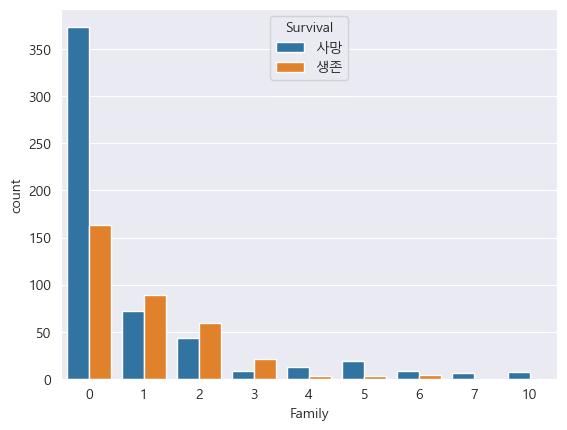

In [214]:
ax = sns.countplot(x='Family',  hue = 'Survival' , data = all_data)
plt.show()

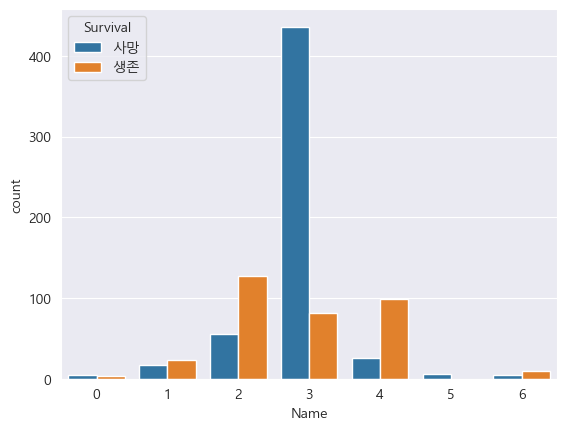

In [215]:
ax = sns.countplot(x='Name',  hue = 'Survival' , data = all_data)
plt.show()

## Cabin 전처리 해보기

In [216]:
all_data['Cabin'].value_counts()

8    1014
2      94
1      65
3      46
4      41
0      22
5      21
6       5
7       1
Name: Cabin, dtype: int64

In [217]:
all_data

,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned,log_Fare,FareBin,Fare_clean,Family
PassengerId,,,,,,,,,,,,,,,,
1,3,1,2,22.000000,20대,3,1,0,사망,8,7.2500,1.9,1.981001,"(3.17, 7.301]",0,1
2,4,0,0,38.000000,30대,1,1,0,생존,2,71.2833,4.2,4.266662,"(57.0, 83.475]",11,1
3,2,0,2,26.000000,20대,3,0,0,생존,8,7.9250,2.0,2.070022,"(7.896, 8.05]",3,0
4,4,0,2,35.000000,30대,1,1,0,생존,2,53.1000,4.0,3.972177,"(35.077, 57.0]",10,1
5,3,1,2,35.000000,30대,3,0,0,사망,8,8.0500,2.0,2.085672,"(7.896, 8.05]",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,20대,3,0,0,NaN,8,8.0500,2.0,2.085672,"(7.896, 8.05]",3,0
1306,6,0,0,39.000000,30대,1,0,0,NaN,2,108.9000,4.6,4.690430,"(83.475, 512.329]",12,0
1307,3,1,2,38.500000,30대,3,0,0,NaN,8,7.2500,1.9,1.981001,"(3.17, 7.301]",0,0


In [218]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 나이 열 변환
all_data['Age_binned'] = label_encoder.fit_transform(all_data['Age_binned'])

all_data['Survival'] = label_encoder.fit_transform(all_data['Survival'])
all_data


,Name,Sex,Embarked,Age,Age_binned,Pclass,SibSp,Parch,Survival,Cabin,Fare,Fare_binned,log_Fare,FareBin,Fare_clean,Family
PassengerId,,,,,,,,,,,,,,,,
1,3,1,2,22.000000,2,3,1,0,0,8,7.2500,1.9,1.981001,"(3.17, 7.301]",0,1
2,4,0,0,38.000000,3,1,1,0,1,2,71.2833,4.2,4.266662,"(57.0, 83.475]",11,1
3,2,0,2,26.000000,2,3,0,0,1,8,7.9250,2.0,2.070022,"(7.896, 8.05]",3,0
4,4,0,2,35.000000,3,1,1,0,1,2,53.1000,4.0,3.972177,"(35.077, 57.0]",10,1
5,3,1,2,35.000000,3,3,0,0,0,8,8.0500,2.0,2.085672,"(7.896, 8.05]",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,28.516607,2,3,0,0,2,8,8.0500,2.0,2.085672,"(7.896, 8.05]",3,0
1306,6,0,0,39.000000,3,1,0,0,2,2,108.9000,4.6,4.690430,"(83.475, 512.329]",12,0
1307,3,1,2,38.500000,3,3,0,0,2,8,7.2500,1.9,1.981001,"(3.17, 7.301]",0,0


In [219]:
# from sklearn.preprocessing import OneHotEncoder
#
# encoder = OneHotEncoder() # 원-핫 인코더 생성
#
# all_data_encoded = encoder.fit_transform(all_data)
#
# all_data_encoded

In [220]:
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_encoded[:num_train] # 0~num_train -1 행
# X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values

In [221]:
features2 = all_data.columns.tolist()
features2

['Name',
 'Sex',
 'Embarked',
 'Age',
 'Age_binned',
 'Pclass',
 'SibSp',
 'Parch',
 'Survival',
 'Cabin',
 'Fare',
 'Fare_binned',
 'log_Fare',
 'FareBin',
 'Fare_clean',
 'Family']

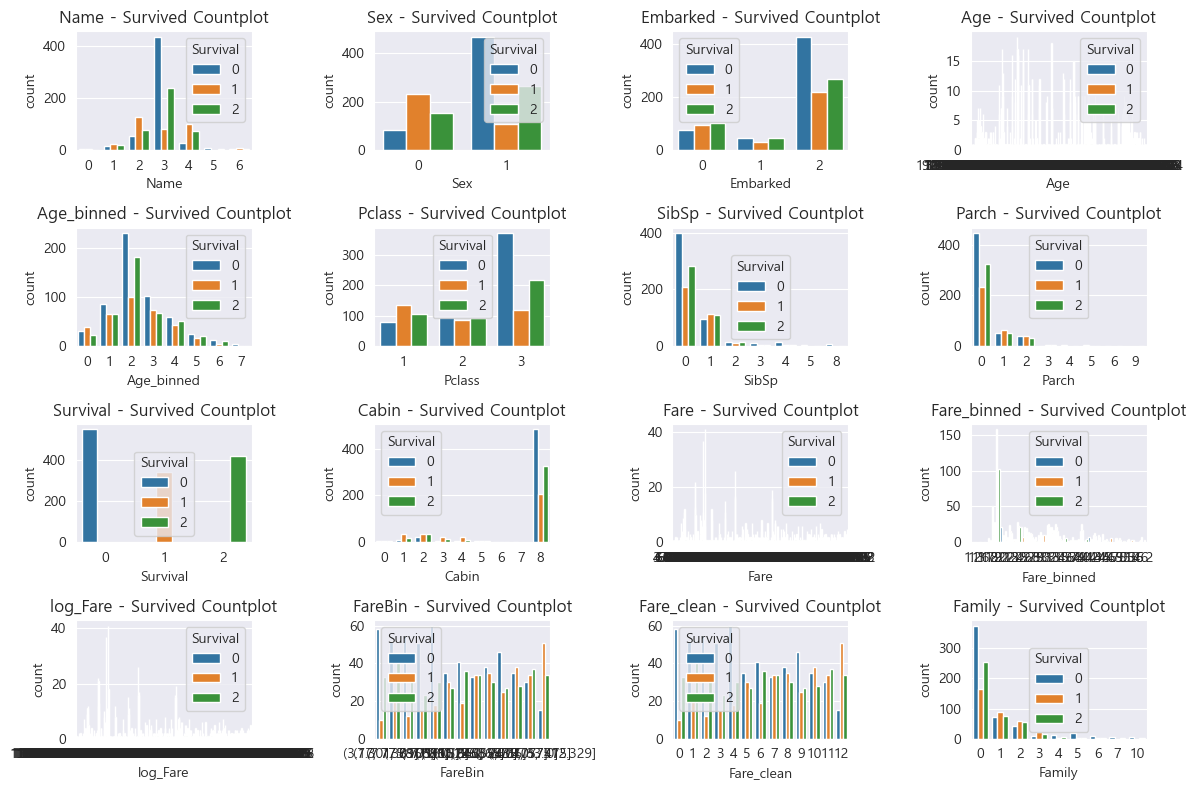

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯을 생성할 크기 설정
plt.figure(figsize=(12, 8))

# 피처들의 리스트
features = features2

# 피처들에 대한 countplot 그리기
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, hue='Survival', data=all_data)
    plt.title(f'{feature} - Survived Countplot')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


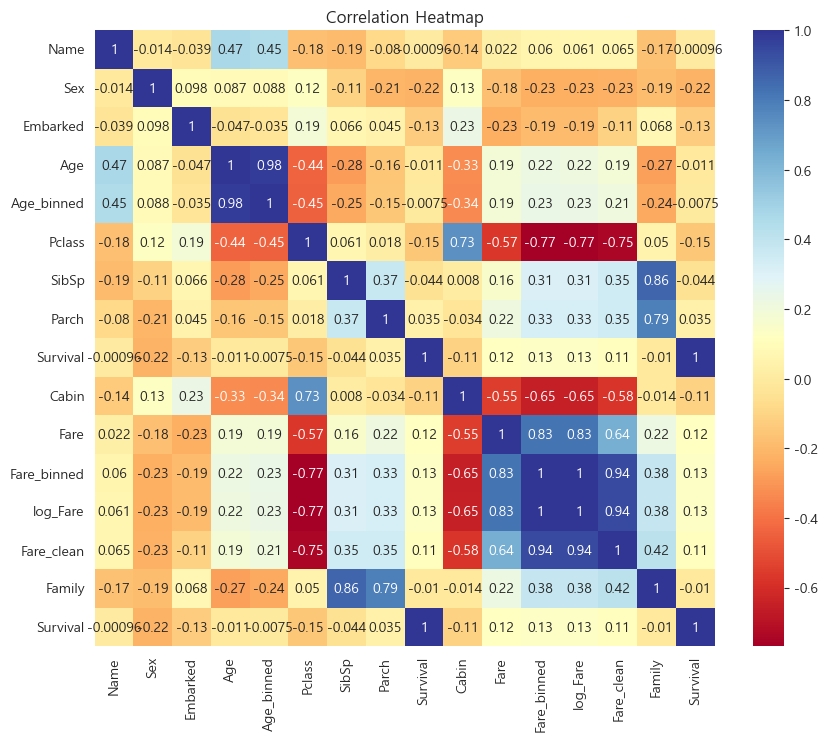

In [223]:
import seaborn as sns

# 피처들의 리스트
features = features

# 각 피처별 'Survived'와의 상관계수 계산
correlations = all_data[features + ['Survival']].corr()
# filtered_correlations = correlations[correlations['Survival'].abs() >= 0.2]

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='RdYlBu')
plt.title("Correlation Heatmap")

# 그래프 출력
plt.show()


In [224]:
object_col = ['Name' , 'Sex' , 'Embarked'  ,'Age_binned', 'Fare_clean' ,  'Cabin'  ]
binary_col = ['Fare' ,'Family', 'Pclass', 'log_Fare'  ]

idx_col = ['Age_binned' , 'Fare_binned']

In [225]:
all_data.columns.tolist()

['Name',
 'Sex',
 'Embarked',
 'Age',
 'Age_binned',
 'Pclass',
 'SibSp',
 'Parch',
 'Survival',
 'Cabin',
 'Fare',
 'Fare_binned',
 'log_Fare',
 'FareBin',
 'Fare_clean',
 'Family']

In [226]:
all_data_2 = all_data[['Name' , 'Sex' , 'Embarked' , 'Age_binned' , 'Pclass', 'SibSp' , 'Parch', 'Cabin','Fare_clean'  ,'Family'  ]]

all_data_2

,Name,Sex,Embarked,Age_binned,Pclass,SibSp,Parch,Cabin,Fare_clean,Family
PassengerId,,,,,,,,,,
1,3,1,2,2,3,1,0,8,0,1
2,4,0,0,3,1,1,0,2,11,1
3,2,0,2,2,3,0,0,8,3,0
4,4,0,2,3,1,1,0,2,10,1
5,3,1,2,3,3,0,0,8,3,0
...,...,...,...,...,...,...,...,...,...,...
1305,3,1,2,2,3,0,0,8,3,0
1306,6,0,0,3,1,0,0,2,12,0
1307,3,1,2,3,3,0,0,8,0,0


In [ ]:
all_data_2['Family'] = 1 + all_data['SibSp'] + all_data['Parch']

all_data_2['Solo'] = (all_data_2['Family'] ==1)
all_data_2['Solo'] = LabelEncoder().fit_transform(all_data_2['Solo'])
all_data_2

## 타깃값 분포

In [ ]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬


## 연속형 피처 분포

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
ax = sns.countplot(x='Fare_clean', hue='Survival', data=all_data)

# x 축 값이 잘 보이도록 설정
ax.tick_params(axis='x', labelrotation=45)

# 그래프 출력
plt.show()

# 인코딩 및 스케일링 된 피처 합치기

In [ ]:
import numpy as np

all_data_2 = all_data_2.astype(np.float32)



all_data_2

In [ ]:
all_data

## 로지스틱 회귀

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic regression model creation
logistic_model = LogisticRegression()

# Model training
logistic_model.fit(X_train, y_train)

# Predict
y_pred = logistic_model.predict(X_test)

# Accuracy evaluation
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)


In [ ]:
y_pred

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_pred
submission.to_csv(f'submission_Logistic_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {
    'penalty': ['l1', 'l2'],                      # 규제 유형 ('l1': L1 규제, 'l2': L2 규제)
    'C': [0.1, 1.0, 10.0],                        # 규제 강도의 역수 (값이 작을수록 강한 규제)
    'solver': ['lbfgs', 'newton-cg', 'saga'],      # 최적화에 사용할 알고리즘
    'max_iter': [50,100,150],                 # 최대 반복 횟수
    'class_weight': [None, 'balanced'],            # 클래스 가중치 (None: 균등한 가중치, 'balanced': 불균등한 가중치)
    'dual': [True, False],                         # 이중 문제 유형 (True: 이중 문제 사용, False: 원 문제 사용)
    # 'fit_intercept': [True, False],                # 절편(intercept) 학습 여부
    # 'intercept_scaling': [1, 2, 3],                # 절편의 스케일링 비율
    # 'l1_ratio': [None, 0.2, 0.5],                  # L1 규제와 L2 규제 사이의 혼합 비율
    # 'multi_class': ['auto', 'ovr', 'multinomial'], # 다중 클래스 처리 방법 ('auto': 자동 선택, 'ovr': 일대다, 'multinomial': 다항 분류)
    'n_jobs': [None, -1],                          # 병렬 처리에 사용할 CPU 코어 수 (None: 1개, -1: 모든 코어)
    'random_state': [42],                          # 난수 발생 시드 값
    'tol': [0.0001, 0.001, 0.01],                  # 수렴 기준 (작을수록 더 정밀한 계산)
    # 'verbose': [0, 1, 2],                          # 출력 메시지 레벨 (0: 출력 없음, 1: 진행 상황 메시지, 2: 모든 메시지)
    # 'warm_start': [True, False]                    # 이전 학습 결과를 재사용하여 학습 계속 여부
}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc',
                                         cv=5)

# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y_train)
print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)



In [ ]:
y_preds = gridsearch_logistic_model.predict(X_test)

y_preds

In [ ]:
print(f'Decsion Tree에 대한 점수 : {gridsearch_logistic_model.score(X_train , y_train)}')
accuracy = accuracy_score(y_preds, y_test)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [ ]:
from sklearn.metrics import classification_report


# 분류 보고서 생성
report = classification_report(y_test, y_preds)

# 결과 출력
print(report)


In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
print(f'Decsion Tree에 대한 점수 : {gridsearch_logistic_model.score(X_valid , y_valid)}')

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_DescisionTree_logistic_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

 위의 코드는 이미 K-Fold 교차 검증을 적용하고 있습니다. GridSearchCV 함수의 cv 매개변수를 5로 설정하여 5-Fold 교차 검증을 수행하고 있습니다. cv 매개변수를 원하는 K 값으로 변경하여 다른 K-Fold 값에서 교차 검증을 수행할 수 있습니다.

따라서, 위의 코드는 이미 K-Fold 교차 검증을 시행하고 있으며, 각 Fold에서의 최적 모델과 파라미터를 출력하고 있습니다.

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid = {
    'max_depth': [2, 3, 5, 10],                        # 의사결정트리의 최대 깊이
    'min_samples_split': [1, 2, 3, 5, 7, 10],            # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6],           # 리프 노드에 필요한 최소 샘플 수
    'ccp_alpha': [0.0, 0.1, 0.2],                     # Cost-Complexity Pruning (CCP) 알고리즘에 대한 복잡성 매개변수
    # 'class_weight': [None, 'balanced'],               # 클래스별 가중치 (None: 균등한 가중치, 'balanced': 불균등한 가중치)
    'criterion': ['gini', 'entropy'],                  # 불순도(impurity) 계산에 사용할 기준 ('gini': Gini 불순도, 'entropy': 엔트로피)
    # 'max_features': ['auto', 'sqrt', 'log2', None],    # 각 분할에서 고려할 최대 특성 개수 ('auto': sqrt(features), 'sqrt': sqrt(features), 'log2': log2(features), None: 모든 특성)
    'max_leaf_nodes': [1, 5, 10, 15],               # 리프 노드의 최대 개수 (None: 제한 없음, 정수 값: 리프 노드의 최대 개수)
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],          # 분할 기준으로서 필요한 최소 불순도 감소량
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2],       # 리프 노드의 최소 가중치 비율
    'random_state': [42],                              # 난수 발생 시드 값
    'splitter': ['best', 'random']                     # 분할 기준을 선택하는 전략 ('best': 최적의 분할, 'random': 무작위 분할)
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(dt_model, param_grid, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_dc = grid_search.best_estimator_
best_params_grid_search_dc = grid_search.best_params_
print("Best Model:", best_model_grid_search_dc)
print("Best Parameters:", best_params_grid_search_dc)


In [ ]:
y_preds = best_model_grid_search_dc.predict(X_test)

y_preds

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)

print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_dc.score(X_train , y_train)}')

In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X_train= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values
#
#
# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_dc.score(X_valid , y_valid)}')

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize =  (30,15)) # 그래프 크기 설정

ax =plot_tree(best_model_grid_search_dc, max_depth=5, fontsize=15)
# 트리 그래프 출력

plt.show()

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_gridsearch_DescisionTree_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## LightGBM 모델

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

LogisticRegression 모델은 LogisticRegression 클래스의 생성자에서 매개변수를 지정할 수 있는데, 이 클래스는 유효하지 않은 매개변수가 입력되면 ValueError를 발생시킵니다.

반면에 LightGBM 모델은 LGBMClassifier 클래스의 생성자에서 매개변수를 지정하는데, 이 클래스는 유효하지 않은 매개변수를 무시하고 넘어가는 동작을 합니다. 따라서 LightGBM 모델에서는 유효하지 않은 매개변수가 입력되어도 그리드 서치 수행에 영향을 주지 않고 다른 유효한 매개변수들에 대해서만 최적의 모델을 탐색하게 됩니다.

이러한 동작 차이 때문에 LogisticRegression 모델에서는 유효하지 않은 매개변수를 입력하면 에러가 발생하지만, LightGBM 모델에서는 무시되고 다른 매개변수들에 대해서만 그리드 서치가 수행됩니다.

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

# LightGBM 모델 생성
lgb_model = lgb.LGBMClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lgb = {
    'max_depth': [4,5],                        # 트리의 최대 깊이
    'learning_rate': [0.01, 0.05],               # 학습률
    'n_estimators': [300, 400],             # 트리의 개수
    'min_child_samples': [1, 2],           # 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.05],                   # 트리를 학습할 때 사용할 샘플링 비율
    'colsample_bytree': [0.8,0.9, 1],                # 트리를 학습할 때 사용할 특성의 비율
    'reg_alpha': [0.1,0.2],                     # L1 정규화 항의 가중치
    'reg_lambda': [0.0, 0.1],                         # L2 정규화 항의 가중치
    'ManchesterUNITED': [2, 3]                   # 유효하지 않은 매개변수 (무시됨)
}

# 그리드 서치 객체 생성
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_lgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lgb = grid_search_lgb.best_estimator_
best_params_grid_search_lgb = grid_search_lgb.best_params_
print("Best Model (LightGBM):", best_model_grid_search_lgb)
print("Best Parameters (LightGBM):", best_params_grid_search_lgb)


In [ ]:
y_preds = best_model_grid_search_lgb.predict(X_test)

y_preds

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_lgb.score(X_train , y_train)}')

In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X_train= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_lgb.score(X_valid , y_valid)}')

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_DescisionTree_lgb_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_xgb = {
    # 'max_depth': [3, 5],
    # 'learning_rate': [0.01 , 0.05],
    # 'n_estimators': [300, 400],
    # 'subsample': [1.0 ],  # subsample 비율
    # 'colsample_bytree': [0.8, 0.9 ],  # 각 트리에 사용되는 특성(feature)의 비율
    # 'gamma': [0 , 0.1],  # 트리 노드를 추가로 분할하기 위한 최소 손실 감소값
    # 'reg_alpha': [0.01 ],  # L1 정규화 항의 가중치
    # 'reg_lambda': [0]  # L2 정규화 항의 가중치
    "n_estimators":[200 , 300],
    "max_depth":[3,4,5],
    "learning_rate":[.01,.1,.2],
    "subsample":[.8 , 1.0],
    "colsample_bytree":[0.8,1],
    "gamma":[0,0.1,1,5],
    "lambda":[.01,.1,1],
    "ManchesterUTD" : [0, 0.2]

}

# 그리드 서치 객체 생성
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_xgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_xgb = grid_search_xgb.best_estimator_
best_params_grid_search_xgb = grid_search_xgb.best_params_
print("Best Model (XGBoost):", best_model_grid_search_xgb)
print("Best Parameters (XGBoost):", best_params_grid_search_xgb)


In [ ]:
y_preds = best_model_grid_search_xgb.predict(X_test)

y_preds

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_xgb.score(X_train , y_train)}')

In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X_train= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_xgb.score(X_valid , y_valid)}')

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_DescisionTree_xgb_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## RandomForest

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = submission['Survived'].values

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest 모델 생성
rf_model = RandomForestClassifier()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_rf = {
    'n_estimators': [100, 200, 300],                   # 트리의 개수
    'max_depth': [None, 5, 10],                        # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],                    # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],                      # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'],           # 각 분할에서 고려할 최대 특성 개수
    # 'max_leaf_nodes': [None, 5, 10],                    # 리프 노드의 최대 개수
    'min_impurity_decrease': [0.0, 0.1, 0.2],           # 분할 기준으로서 필요한 최소 불순도 감소량
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],        # 리프 노드의 최소 가중치 비율
    'n_jobs': [-1],                                     # 병렬로 수행할 작업 수 (-1: 모든 가능한 프로세서 사용)
    'random_state': [42],                               # 난수 발생 시드 값
    # 'class_weight': [None, 'balanced'],                 # 클래스별 가중치
    'criterion': ['gini', 'entropy'],                    # 불순도 기준
    'ccp_alpha': [0.0, 0.1, 0.2],                        # Cost-Complexity Pruning (CCP) 알고리즘에 대한 복잡성 매개변수

    #'bootstrap': [True, False],                          # 부트스트래핑 여부
    'oob_score': [True, False],                          # Out-of-Bag 평가 사용 여부
    #'verbose': [0, 1, 2],                                # 학습 과정 중 출력 메시지 정도
    # 'warm_start': [True, False]                          # 이전 호출의 솔루션을 재사용하여 학습 계속 여부
}

# 그리드 서치 객체 생성
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_rf.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_rf = grid_search_rf.best_estimator_
best_params_grid_search_rf = grid_search_rf.best_params_
print("Best Model (Random Forest):", best_model_grid_search_rf)
print("Best Parameters (Random Forest):", best_params_grid_search_rf)


In [ ]:
y_preds = best_model_grid_search_rf.predict(X_test)

y_preds

In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [ ]:
X_test

In [ ]:
y_train

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_rf.score(X_train , y_train)}')

In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X_train= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
print(f'Decsion Tree에 대한 점수 : {best_model_grid_search_rf.score(X_valid , y_valid)}')

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_DescisionTree_rf_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## 앙상블 학습

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# X_train = X_train[feature]
target = train['Survived'].values

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
cross_val_score(clf, X_train, target, cv=k_fold, scoring='accuracy', ).mean()

In [ ]:
from sklearn.ensemble import VotingClassifier

# 최적의 모델들 생성
# best_model_log = gridsearch_logistic_model
# best_model_dc_Tree =  best_model_grid_search_dc
# # best_model_rf = clf
# # best_model_xgb = best_model_grid_search_xgb
# best_model_lgb = best_model_grid_search_lgb

# 앙상블 모델 생성
ensemble_model = VotingClassifier(
    estimators=[('dct', best_model_grid_search_dc), ('lgb', best_model_grid_search_lgb)],
    voting='soft'  # 확률 기반의 소프트 보팅 방식 사용
)

# ensemble_model = VotingClassifier(
#     estimators= [('dct' , best_model_dc_Tree) , ('lgb', best_model_lgb)],
#     # estimators=[('log', best_model_log),('dcT', best_model_dc_Tree),('rf', best_model_rf), ('xgb', best_model_xgb), ('lgb', best_model_lgb)],
#     voting='soft'  # 소프트 보팅 방식 사용 (확률 기반)
# )

# 앙상블 모델 훈련
ensemble_model.fit(X_train, y_train)

# 앙상블 모델 예측
ensemble_predictions = ensemble_model.predict(X_test)
y_preds = ensemble_predictions

In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [ ]:
y_preds = ensemble_predictions

y_preds

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


In [ ]:
print(ensemble_model.score(X_train, y_train))

In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X_train= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
print(ensemble_model.score(X_valid , y_valid))

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## Stacking 활용해보기

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# 개별 모델의 best_estimator_ 가져오기
model_1_best = best_model_grid_search_lgb
model_2_best = best_model_grid_search_dc


# 개별 모델 정의
model_1 = model_1_best
model_2 = model_2_best


# 메타 모델 정의
meta_model = LogisticRegression()

# Stacking 앙상블
stacking_model = StackingClassifier(
    estimators=[('model_1', model_1), ('model_2', model_2)],
    final_estimator=meta_model
)

# 앙상블 모델 학습
stacking_model.fit(X_train, y_train)

# 앙상블 모델 예측
ensemble_preds = stacking_model.predict(X_test)

y_preds= ensemble_preds

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble_STACKING_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## Gradiant 사용해보기

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
# 개별 모델 정의
model_1 = best_model_grid_search_lgb
model_2 = best_model_grid_search_dc



# Gradient Boosting 앙상블
boosting_model = GradientBoostingClassifier(
    n_estimators=2,  # 앙상블에 사용할 모델의 수
    learning_rate=0.8, # 각 모델의 중요도 조절
    max_depth=1
)

# 앙상블 모델에 개별 모델 추가
boosting_model.estimators_ = [model_1, model_2]

# 앙상블 모델 학습
boosting_model.fit(X_train, y_train)

# 앙상블 모델 예측
ensemble_preds = boosting_model.predict(X_test)

y_preds = ensemble_preds

y_preds

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble_Gradient Boosting_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
import numpy as np

# 모델들의 예측 결과 가져오기
pred_logistic = gridsearch_logistic_model.predict(X_test)
pred_dc = best_model_grid_search_dc.predict(X_test)
pred_rf = best_model_grid_search_rf.predict(X_test)
pred_xgb = best_model_grid_search_xgb.predict(X_test)
pred_lgb = best_model_grid_search_lgb.predict(X_test)

# 예측 결과를 numpy 배열로 변환
preds = np.array([pred_logistic, pred_dc, pred_rf, pred_xgb, pred_lgb])

# 상관 계수 계산
correlation_matrix = np.corrcoef(preds)

print("Correlation Matrix:")
print(correlation_matrix)

## 앙상블 다시 개별 학습

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 개별 모델 생성
model_logistic = LogisticRegression()
model_dc_tree = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_xgb = xgb.XGBClassifier()
model_lgb = lgb.LGBMClassifier()

# 개별 모델의 하이퍼파라미터 그리드 준비
param_grid_logistic = {'C': [0.1, 0.5, 1.0], 'max_iter': [100, 200, 500]}
param_grid_dc_tree = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}
param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
param_grid_lgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}

# 개별 모델의 그리드 서치 객체 생성
grid_search_logistic = GridSearchCV(model_logistic, param_grid_logistic, cv=5)
grid_search_dc_tree = GridSearchCV(model_dc_tree, param_grid_dc_tree, cv=5)
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5)
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=5)
grid_search_lgb = GridSearchCV(model_lgb, param_grid_lgb, cv=5)

# 개별 모델의 그리드 서치 수행
grid_search_logistic.fit(X_train, y_train)
grid_search_dc_tree.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
grid_search_lgb.fit(X_train, y_train)

# 최적의 개별 모델 및 파라미터 출력
best_model_logistic = grid_search_logistic.best_estimator_
best_model_dc_tree = grid_search_dc_tree.best_estimator_
best_model_rf = grid_search_rf.best_estimator_
best_model_xgb = grid_search_xgb.best_estimator_
best_model_lgb = grid_search_lgb.best_estimator_

# 앙상블 모델 생성
ensemble_model = VotingClassifier(
    estimators=[
        ('log', best_model_logistic),
        ('dcT', best_model_dc_tree),
        ('rf', best_model_rf),
        ('xgb', best_model_xgb),
        ('lgb', best_model_lgb)
    ],
    voting='soft'
)


In [ ]:

# 앙상블 모델 훈련
ensemble_model.fit(X_train, y_train)

# 앙상블 모델 예측
ensemble_predictions = ensemble_model.predict(X_test)
print(ensemble_model.score(X_train, y_train))

In [ ]:
y_preds = ensemble_predictions

y_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble2_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## 블로그 따라잡기

In [ ]:
all_data_2

In [ ]:
all_data['Family'] = 1 + all_data['SibSp'] + all_data['Parch']

all_data['Solo'] = (all_data['Family'] ==1)

all_data

In [ ]:
all_data['Name'].value_counts()

In [ ]:
feature = [
    'Pclass',
    'Sex',
    'SibSp',
    'Parch',
    'Embarked',
    'Family',
    'Name',
    'Solo',
    'Age_binned',
    'Cabin',
    'Fare_clean'
]

label = [
    'Survived',
]

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = submission['Survived'].values

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train = X_train[feature]
target = train[label]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
cross_val_score(clf, X_train, target, cv=k_fold, scoring='accuracy', ).mean()
# Accuracy
# 0.8271660424469414

In [ ]:
x_train = X_train[feature]
x_test = X_test[feature]
y_train = train[label]

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)

y_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_Random_blog_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

In [ ]:
all_data['Survival'] = label_encoder.fit_transform(all_data['Survival'])

all_data['Survival']

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test1= all_data[num_train:] # num_train ~ 마지막 행

# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, \
    StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

sk_fold = StratifiedKFold(10,shuffle=True, random_state=42)
sc =StandardScaler()
X_train= sc.fit_transform(X_train)
X_train_1= sc.transform(X.values)
X_test= sc.transform(X_test)
X_submit= sc.transform(X_test1.values)
log_reg = LogisticRegression()
ran_for  = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier(n_estimators=100)
#hist_grad_boost = HistGradientBoostingClassifier()
knn = KNeighborsClassifier()
tree= DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()
clf = [("Logistic Regression",log_reg,{"penalty":['l2'],"C":[100, 10, 1.0, 0.1, 0.01]}),\
       ("Support Vector",svc,{"kernel": ["rbf"],"gamma":[0.1, 1, 10, 100],"C":[0.1, 1, 10, 100, 1000]}),\
       ("Decision Tree", tree, {}),\
       ("Random Forest",ran_for,{"n_estimators":[100],"random_state":[42],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),\
       ("Adapative Boost",ada_boost,{"n_estimators":[100],"learning_rate":[.6,.8,1]}),\
       ("Gradient Boost",grad_boost,{}),\
       #("Histogram GB",hist_grad_boost,{"loss":["binary_crossentropy"],"min_samples_leaf":[5,10,20,40,50],"l2_regularization":[0,.1,1]}),\
       ("XGBoost",xgb,{"n_estimators":[200],"max_depth":[3,4,5],"learning_rate":[.01,.1,.2],"subsample":[.8],"colsample_bytree":[1],"gamma":[0,1,5],"lambda":[.01,.1,1]}),\
      ("K Nearest",knn,{"n_neighbors":[3,5,8],"leaf_size":[25,30,35]})]
stack_list=[]
train_scores = pd.DataFrame(columns=["Name","Train Score","Test Score"])
i=0
for name,clf1,param_grid in clf:
    clf = GridSearchCV(clf1,param_grid=param_grid,scoring="accuracy",cv=sk_fold,return_train_score=True)
    clf.fit(X_train,y_train.reshape(-1,1))
    y_pred = clf.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    #train_scores.loc[i]= [name,cross_val_score(clf,X_train,y_train,cv=sk_fold,scoring="accuracy").mean(),(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    train_scores.loc[i]= [name,clf.best_score_,(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    stack_list.append(clf.best_estimator_)
    i=i+1

est = [("dec_tree",stack_list[2]),("ran_for",stack_list[3]),("ada_boost",stack_list[4]),("grad_boost",stack_list[5]),("hist_grad_boost",stack_list[6]),("svc",stack_list[1]),("lr",stack_list[0]),("knn",stack_list[8])]
sc = StackingClassifier(estimators=est,final_estimator = stack_list[2],cv=sk_fold,passthrough=False)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
y_pred_train = sc.predict(X_train)
cm2 = confusion_matrix(y_train,y_pred_train)
train_scores.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])],index=train_scores.columns),ignore_index=True)

In [ ]:
# ! pip install --upgrade scikit-learn


In [ ]:
y_preds = ensemble_predictions

y_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble2_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## 블로그 따라잡기

In [ ]:
all_data_2

In [ ]:
feature = [
    'Pclass',
    'Sex',
    'SibSp',
    'Parch',
    'Embarked',
    'Family',
    'Name',
    'Solo',
    'Age_binned',
    'Cabin',
    'Fare_clean'
]

label = [
    'Survived',
]

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# X_train = X_train[feature]
target = train[label].values

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
cross_val_score(clf, X_train, target, cv=k_fold, scoring='accuracy', ).mean()
# Accuracy
# 0.8271660424469414

In [ ]:


clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
clf.fit(X_train, target)
y_preds = clf.predict(X_test)

y_preds

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


In [ ]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


In [176]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = submission['Survived'].values

In [177]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train = X_train[feature]
target = train[label]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
cross_val_score(clf, X_train, target, cv=k_fold, scoring='accuracy', ).mean()
# Accuracy
# 0.8271660424469414

KeyError: "['Fare_clean'] not in index"

In [ ]:
x_train = X_train[feature]
x_test = X_test[feature]
y_train = train[label]

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)

y_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_Random_blog_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

In [ ]:
all_data['Survival'] = label_encoder.fit_transform(all_data['Survival'])

all_data['Survival']

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test1= all_data[num_train:] # num_train ~ 마지막 행

# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, \
    StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

sk_fold = StratifiedKFold(10,shuffle=True, random_state=42)
sc =StandardScaler()
X_train= sc.fit_transform(X_train)
X_train_1= sc.transform(X.values)
X_test= sc.transform(X_test)
X_submit= sc.transform(X_test1.values)
log_reg = LogisticRegression()
ran_for  = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier(n_estimators=100)
#hist_grad_boost = HistGradientBoostingClassifier()
knn = KNeighborsClassifier()
tree= DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()
clf = [("Logistic Regression",log_reg,{"penalty":['l2'],"C":[100, 10, 1.0, 0.1, 0.01]}),\
       ("Support Vector",svc,{"kernel": ["rbf"],"gamma":[0.1, 1, 10, 100],"C":[0.1, 1, 10, 100, 1000]}),\
       ("Decision Tree", tree, {}),\
       ("Random Forest",ran_for,{"n_estimators":[100],"random_state":[42],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),\
       ("Adapative Boost",ada_boost,{"n_estimators":[100],"learning_rate":[.6,.8,1]}),\
       ("Gradient Boost",grad_boost,{}),\
       #("Histogram GB",hist_grad_boost,{"loss":["binary_crossentropy"],"min_samples_leaf":[5,10,20,40,50],"l2_regularization":[0,.1,1]}),\
       ("XGBoost",xgb,{"n_estimators":[200],"max_depth":[3,4,5],"learning_rate":[.01,.1,.2],"subsample":[.8],"colsample_bytree":[1],"gamma":[0,1,5],"lambda":[.01,.1,1]}),\
      ("K Nearest",knn,{"n_neighbors":[3,5,8],"leaf_size":[25,30,35]})]
stack_list=[]
train_scores = pd.DataFrame(columns=["Name","Train Score","Test Score"])
i=0
for name,clf1,param_grid in clf:
    clf = GridSearchCV(clf1,param_grid=param_grid,scoring="accuracy",cv=sk_fold,return_train_score=True)
    clf.fit(X_train,y_train.reshape(-1,1))
    y_pred = clf.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    #train_scores.loc[i]= [name,cross_val_score(clf,X_train,y_train,cv=sk_fold,scoring="accuracy").mean(),(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    train_scores.loc[i]= [name,clf.best_score_,(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    stack_list.append(clf.best_estimator_)
    i=i+1

est = [("dec_tree",stack_list[2]),("ran_for",stack_list[3]),("ada_boost",stack_list[4]),("grad_boost",stack_list[5]),("hist_grad_boost",stack_list[6]),("svc",stack_list[1]),("lr",stack_list[0]),("knn",stack_list[8])]
sc = StackingClassifier(estimators=est,final_estimator = stack_list[2],cv=sk_fold,passthrough=False)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
y_pred_train = sc.predict(X_train)
cm2 = confusion_matrix(y_train,y_pred_train)
train_scores.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])],index=train_scores.columns),ignore_index=True)

In [ ]:
# ! pip install --upgrade scikit-learn


In [ ]:
y_preds = ensemble_predictions

y_preds

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_ensemble2_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## 블로그 따라잡기

In [178]:
all_data_2

,Name,Sex,Embarked,Age_binned,Pclass,SibSp,Parch,Cabin,Fare_clean,Family
PassengerId,,,,,,,,,,
1,3.0,1.0,2.0,2.0,3.0,1.0,0.0,8.0,0.0,1.0
2,4.0,0.0,0.0,3.0,1.0,1.0,0.0,2.0,11.0,1.0
3,2.0,0.0,2.0,2.0,3.0,0.0,0.0,8.0,3.0,0.0
4,4.0,0.0,2.0,3.0,1.0,1.0,0.0,2.0,10.0,1.0
5,3.0,1.0,2.0,3.0,3.0,0.0,0.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1305,3.0,1.0,2.0,2.0,3.0,0.0,0.0,8.0,3.0,0.0
1306,6.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,12.0,0.0
1307,3.0,1.0,2.0,3.0,3.0,0.0,0.0,8.0,0.0,0.0


,Name,Sex,Embarked,Age_binned,Pclass,SibSp,Parch,Cabin,Fare_clean,Family,Solo
PassengerId,,,,,,,,,,,
1,3.0,1.0,2.0,2.0,3.0,1.0,0.0,8.0,0.0,2,False
2,4.0,0.0,0.0,3.0,1.0,1.0,0.0,2.0,11.0,2,False
3,2.0,0.0,2.0,2.0,3.0,0.0,0.0,8.0,3.0,1,True
4,4.0,0.0,2.0,3.0,1.0,1.0,0.0,2.0,10.0,2,False
5,3.0,1.0,2.0,3.0,3.0,0.0,0.0,8.0,3.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,1.0,2.0,2.0,3.0,0.0,0.0,8.0,3.0,1,True
1306,6.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,12.0,1,True
1307,3.0,1.0,2.0,3.0,3.0,0.0,0.0,8.0,0.0,1,True


In [180]:
feature = [
    'Pclass',
    'Sex',
    'SibSp',
    'Parch',
    'Embarked',
    'Family',
    'Name',
    'Solo',
    'Age_binned',
    'Cabin',
    'Fare_clean'
]

label = [
    'Survived',
]

In [196]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data_2[:num_train] # 0~num_train -1 행
X_test = all_data_2[num_train:] # num_train ~ 마지막 행

y_train = train['Survived'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = origin_submission['Survived'].values

In [201]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# X_train = X_train[feature]
target = train[label].values

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
cross_val_score(clf, X_train, target, cv=k_fold, scoring='accuracy', ).mean()
# Accuracy
# 0.8271660424469414

C:\Users\park sung hyuk95\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\park sung hyuk95\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\park sung hyuk95\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\park sung hyuk95\AppData\Roaming\P

0.8271036204744069

In [202]:


clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
clf.fit(X_train, target)
y_preds = clf.predict(X_test)

y_preds

C:\Users\park sung hyuk95\AppData\Local\Temp\ipykernel_15436\4273831239.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, target)


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [203]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 테스트 데이터에 대한 예측 수행

# 정확도 계산
accuracy = accuracy_score(y_test, y_preds)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_preds)
print("Precision:", precision)

# 재현율 계산
recall = recall_score(y_test, y_preds)
print("Recall:", recall)

# F1 스코어 계산
f1 = f1_score(y_test, y_preds)
print("F1 Score:", f1)

# ROC AUC 계산
roc_auc = roc_auc_score(y_test, y_preds)
print("ROC AUC Score:", roc_auc)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


In [195]:
# `y_preds`와 `submission`을 DataFrame으로 변환
y_preds_df = pd.DataFrame(y_preds, columns=['Prediction'])
submission_df = origin_submission.reset_index()

# `y_preds_df`와 `submission_df`를 합치기
compare = pd.concat([y_preds_df, submission_df], axis=1)
compare = compare[['Prediction' , 'Survived']]
compare['Compare'] = (compare['Prediction'] == compare['Survived'])
compare['Compare'].value_counts()


True    418
Name: Compare, dtype: int64

In [194]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv(f'submission_Random_blog_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [5, 25, 13, 16, 12]


In [ ]:
all_data['Survival'] = label_encoder.fit_transform(all_data['Survival'])

all_data['Survival']

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test1= all_data[num_train:] # num_train ~ 마지막 행

# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['Survived'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['Survived'].values

In [ ]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, \
    StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

sk_fold = StratifiedKFold(10,shuffle=True, random_state=42)
sc =StandardScaler()
X_train= sc.fit_transform(X_train)
X_train_1= sc.transform(X.values)
X_test= sc.transform(X_test)
X_submit= sc.transform(X_test1.values)
log_reg = LogisticRegression()
ran_for  = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier(n_estimators=100)
#hist_grad_boost = HistGradientBoostingClassifier()
knn = KNeighborsClassifier()
tree= DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()
clf = [("Logistic Regression",log_reg,{"penalty":['l2'],"C":[100, 10, 1.0, 0.1, 0.01]}),\
       ("Support Vector",svc,{"kernel": ["rbf"],"gamma":[0.1, 1, 10, 100],"C":[0.1, 1, 10, 100, 1000]}),\
       ("Decision Tree", tree, {}),\
       ("Random Forest",ran_for,{"n_estimators":[100],"random_state":[42],"min_samples_leaf":[5,10,20,40,50],"bootstrap":[False]}),\
       ("Adapative Boost",ada_boost,{"n_estimators":[100],"learning_rate":[.6,.8,1]}),\
       ("Gradient Boost",grad_boost,{}),\
       #("Histogram GB",hist_grad_boost,{"loss":["binary_crossentropy"],"min_samples_leaf":[5,10,20,40,50],"l2_regularization":[0,.1,1]}),\
       ("XGBoost",xgb,{"n_estimators":[200],"max_depth":[3,4,5],"learning_rate":[.01,.1,.2],"subsample":[.8],"colsample_bytree":[1],"gamma":[0,1,5],"lambda":[.01,.1,1]}),\
      ("K Nearest",knn,{"n_neighbors":[3,5,8],"leaf_size":[25,30,35]})]
stack_list=[]
train_scores = pd.DataFrame(columns=["Name","Train Score","Test Score"])
i=0
for name,clf1,param_grid in clf:
    clf = GridSearchCV(clf1,param_grid=param_grid,scoring="accuracy",cv=sk_fold,return_train_score=True)
    clf.fit(X_train,y_train.reshape(-1,1))
    y_pred = clf.best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    #train_scores.loc[i]= [name,cross_val_score(clf,X_train,y_train,cv=sk_fold,scoring="accuracy").mean(),(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    train_scores.loc[i]= [name,clf.best_score_,(cm[0,0]+cm[1,1,])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])]
    stack_list.append(clf.best_estimator_)
    i=i+1

est = [("dec_tree",stack_list[2]),("ran_for",stack_list[3]),("ada_boost",stack_list[4]),("grad_boost",stack_list[5]),("hist_grad_boost",stack_list[6]),("svc",stack_list[1]),("lr",stack_list[0]),("knn",stack_list[8])]
sc = StackingClassifier(estimators=est,final_estimator = stack_list[2],cv=sk_fold,passthrough=False)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred)
y_pred_train = sc.predict(X_train)
cm2 = confusion_matrix(y_train,y_pred_train)
train_scores.append(pd.Series(["Stacking",(cm2[0,0]+cm2[1,1,])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]),(cm1[0,0]+cm1[1,1,])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])],index=train_scores.columns),ignore_index=True)

In [ ]:
# ! pip install --upgrade scikit-learn
